In [7]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as pit
import plotly.graph_objects as go
import seaborn as sns
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

## 기간 설정
* 선거 이전: "2016-07-10", "2017-03-09"
* 선거 기간~당선 (2017-03-10 ~ 2017-05-09)
* 당선이후 재임시절까지 (2017-05-10 ~ 2020-10-01)

In [8]:
moon_19 = {
    '우리들휴브레인': '118000',
    '바른손': '018700',
    '고려산업': '002140',
    'DSR제강': '069730',
    'DSR': '155660'}

moon_19

{'우리들휴브레인': '118000',
 '바른손': '018700',
 '고려산업': '002140',
 'DSR제강': '069730',
 'DSR': '155660'}

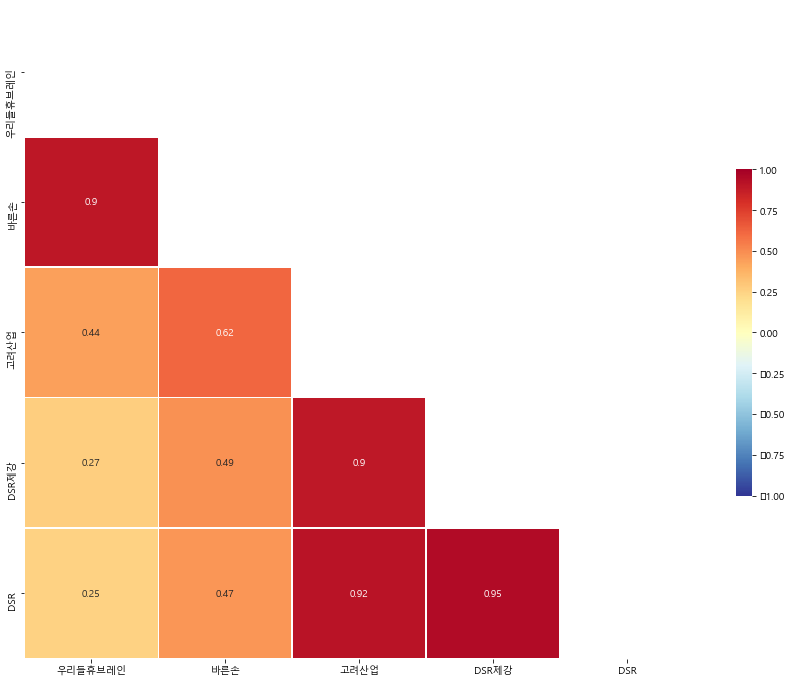

In [9]:
#  선거 이전: "2016-07-10", "2017-03-09"
item_list = []
for item_code in moon_19.values():
    change = fdr.DataReader(item_code, "2016-07-10", "2017-03-09")['Close']
    item_list.append(change)

moon_1617 = pd.concat(item_list, axis=1)
moon_1617.columns = moon_19.keys()
moon_1617.reset_index(inplace=True)

moon_1617 ['Date'] = pd.to_datetime(moon_1617 ['Date'])
moon_1617 .set_index('Date', inplace=True)


moon_1617.corr = moon_1617.corr() 

fig, ax = plt.subplots(figsize=(15,12) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(moon_1617.corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵
sns.heatmap(moon_1617.corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  

plt.savefig('19대_문재인_상관관계_선거이전.png', dpi=300)
#plt.show()

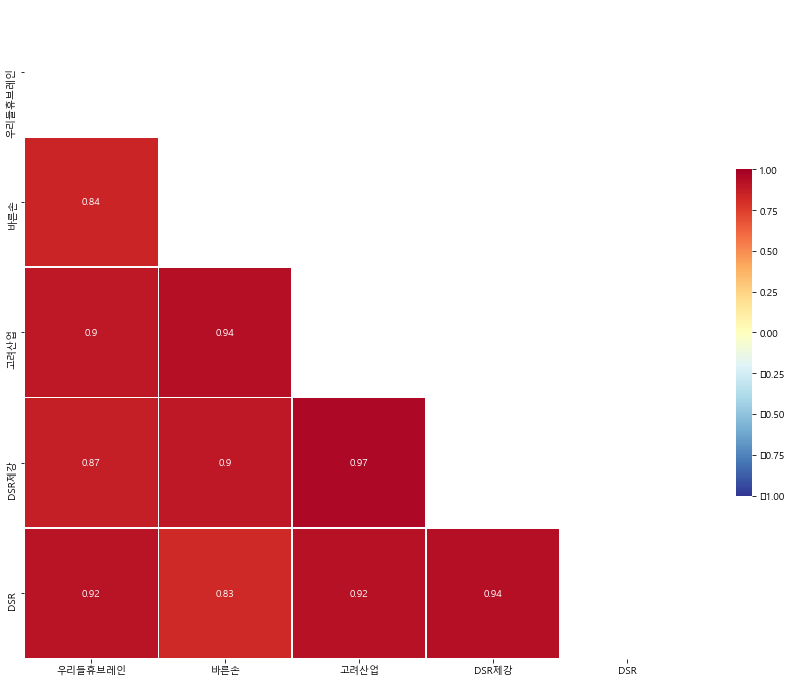

In [5]:
# 선거 기간~당선 (2017-03-10 ~ 2017-05-09)

item_list = []
for item_code in moon_19.values():
    change = fdr.DataReader(item_code, "2017-03-10", "2017-05-09")['Close']
    item_list.append(change)

moon_elect = pd.concat(item_list, axis=1)
moon_elect.columns = moon_19.keys()
moon_elect.reset_index(inplace=True)

moon_elect ['Date'] = pd.to_datetime(moon_elect ['Date'])
moon_elect .set_index('Date', inplace=True)

moon_elect.corr = moon_elect.corr() 

fig, ax = plt.subplots(figsize=(15,12) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(moon_elect.corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵
sns.heatmap(moon_elect.corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

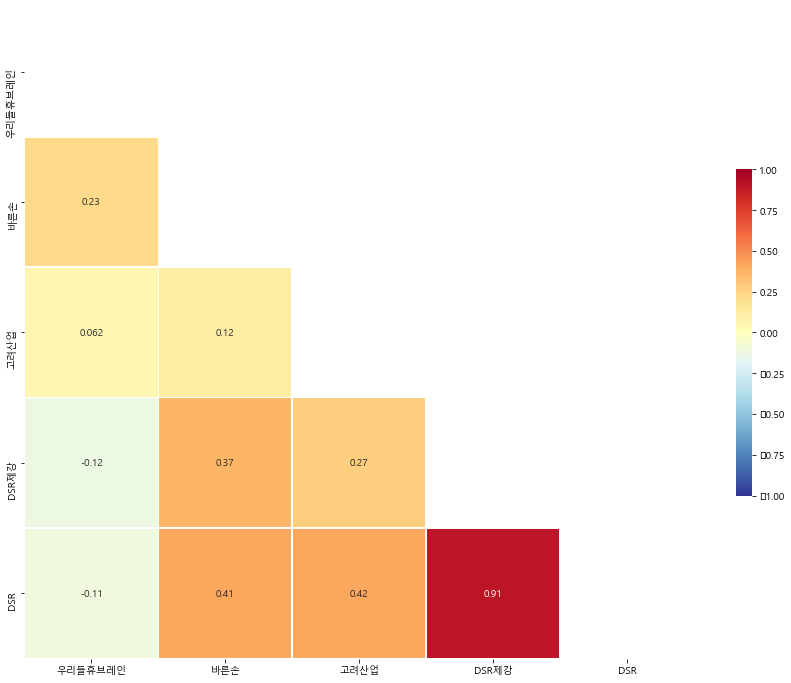

In [6]:
# 당선이후 재임시절까지 (2017-05-10 ~ 2021-10-01)
item_list = []
for item_code in moon_19.values():
    change = fdr.DataReader(item_code, "2017-05-10", "2021-10-01")['Close']
    item_list.append(change)

moon_1721 = pd.concat(item_list, axis=1)
moon_1721.columns = moon_19.keys()
moon_1721.reset_index(inplace=True)

moon_1721['Date'] = pd.to_datetime(moon_1721['Date'])
moon_1721.set_index('Date', inplace=True)

moon_1721.corr = moon_1721.corr() 

fig, ax = plt.subplots(figsize=(15,12) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(moon_1721.corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵
sns.heatmap(moon_1721.corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()